<h1>EDA

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
budget_by_genre = pd.read_csv('./budget_by_genre.csv')

df_budget_genre_studio = pd.read_csv('./budget_genre_studio.csv')

df_imdb_title_crew = pd.read_csv('./crew.csv')

df_names = pd.read_csv('./names.csv')

In [3]:
budget_by_genre.tail()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
1542,1542,49,"Sep 1, 2015",Exeter,25000.0,0.0,489792.0,2015,0.0,489792.0,tt1945044,Exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller","['Horror', 'Mystery', 'Thriller']"
1543,1543,49,"Sep 1, 2015",Exeter,25000.0,0.0,489792.0,2015,0.0,489792.0,tt4931374,Exeter,Exeter,2015,92.0,NaN,NaN
1544,1544,52,"Dec 1, 2015",Dutch Kills,25000.0,0.0,0.0,2015,0.0,0.0,tt2759066,Dutch Kills,Dutch Kills,2015,90.0,"Crime,Drama,Thriller","['Crime', 'Drama', 'Thriller']"
1545,1545,59,"Nov 25, 2011",The Ridges,17300.0,0.0,0.0,2011,0.0,0.0,tt1781935,The Ridges,The Ridges,2011,89.0,"Drama,Horror,Thriller","['Drama', 'Horror', 'Thriller']"
1546,1546,62,"Dec 31, 2014",Stories of Our Lives,15000.0,0.0,0.0,2014,0.0,0.0,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,['Drama']


In [5]:
budget_by_genre['genre'] = budget_by_genre['genres'].str.split(",")
df_genre = budget_by_genre.explode('genre')
df_genre.drop(columns = ['Unnamed: 0', 'id', 'release_date', 'production_budget', 'domestic_gross', \
                         'worldwide_gross', 'primary_title', 'domestic_profit', 'original_title', 'start_year', \
                         'runtime_minutes', 'genres', 'genre_list', 'movie', 'tconst'], inplace = True)
df_genre = df_genre[df_genre['worldwide_profit'] > 0.1]
df_genre['worldwide_profit'] = df_genre['worldwide_profit'] / 1000000
df_genre['worldwide_profit'] = df_genre['worldwide_profit'].round(1)
df_genre

,year,worldwide_profit,genre
0,2011,1045.7,Action
0,2011,1045.7,Adventure
0,2011,1045.7,Fantasy
1,2019,149.8,Action
1,2019,149.8,Adventure
...,...,...,...
1541,2017,0.0,Drama
1542,2015,0.5,Horror
1542,2015,0.5,Mystery
1542,2015,0.5,Thriller


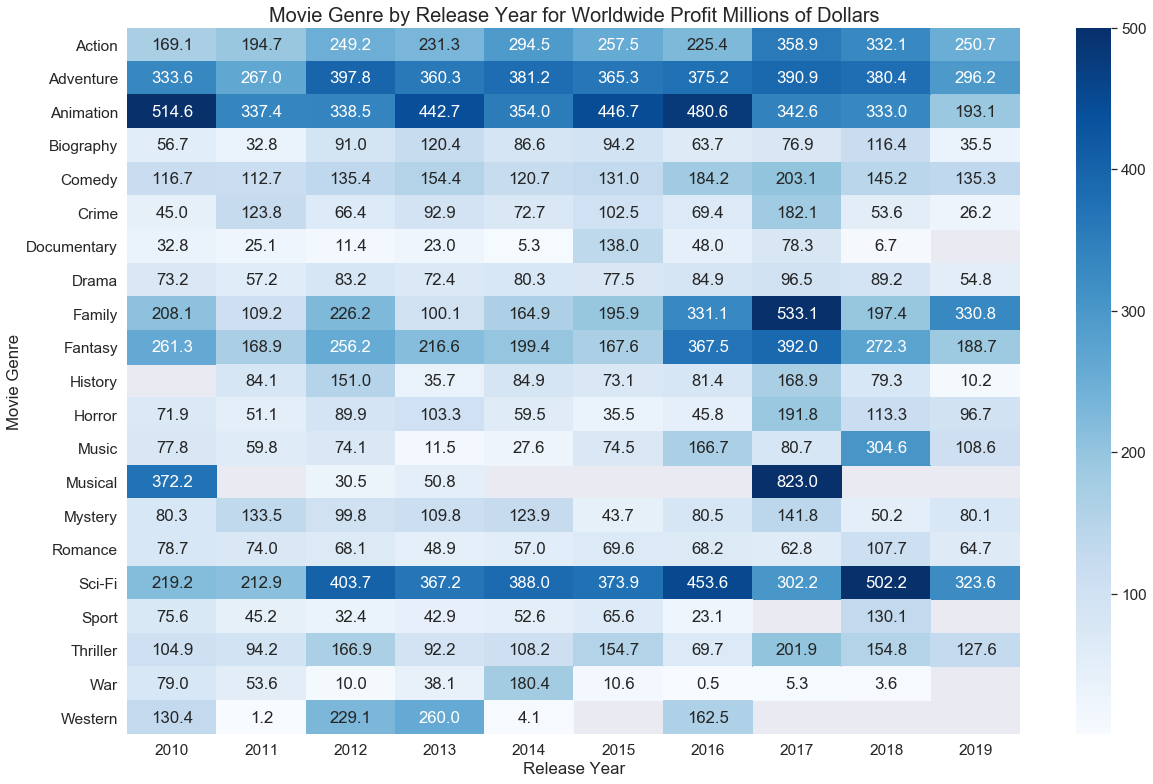

In [172]:
df = pd.pivot_table(data=df_genre,
                    index='genre',
                    values='worldwide_profit',
                    columns='year')
plt.subplots(figsize=(20,13))
plt.title('Movie Genre by Release Year for Worldwide Profit Millions of Dollars', fontsize = 20)
h_map = sns.heatmap(df, cmap="Blues", annot=True, fmt=".1f", vmax=500)
#res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
#res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
sns.set(font_scale=1.4)
bottom = 0
top = 0
bottom, top = h_map.get_ylim()
h_map.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Release Year')
plt.ylabel('Movie Genre')
plt.show()

In [10]:
df_budget_genre_studio.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,...,worldwide_roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,title,studio
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,6.350639e+08,...,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy","['Action', 'Adventure', 'Fantasy']",Pirates of the Caribbean: On Stranger Tides,BV
1,1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,128405868.0,1.072414e+09,...,4.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi","['Action', 'Adventure', 'Sci-Fi']",Avengers: Age of Ultron,BV
2,2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,378815482.0,1.748134e+09,...,6.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi","['Action', 'Adventure', 'Sci-Fi']",Avengers: Infinity War,BV
3,3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,2017,-70975705.0,3.559452e+08,...,2.186484,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy","['Action', 'Adventure', 'Fantasy']",Justice League,WB
4,4,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,2015,-99925825.0,5.796209e+08,...,2.932070,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller","['Action', 'Adventure', 'Thriller']",Spectre,Sony


In [168]:
# Action, Adventure, Animation, Fantasy, Sci-Fi
# Profit by studio for the highest profit genre over the last 5 years
df_budget_genre_studio['genre'] = df_budget_genre_studio['genres'].str.split(",")
df_studio = df_budget_genre_studio.explode('genre')

df_studio.drop(columns = ['Unnamed: 0', 'id', 'release_date', 'production_budget', 'domestic_gross', \
                         'worldwide_gross', 'primary_title', 'domestic_profit', 'original_title', 'start_year', \
                         'runtime_minutes', 'genres', 'genre_list', 'movie', 'tconst', 'title', 'domestic_roi'], inplace = True)
df_studio = df_studio[df_studio['worldwide_profit'] > 0.1]
df_studio['worldwide_profit'] = df_studio['worldwide_profit'] / 1000000
df_studio['worldwide_profit'] = df_studio['worldwide_profit'].round(1)
df_studio = df_studio.groupby(['genre', 'studio']).mean()
df_studio.drop(['Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Music', 'Musical', \
                'Mystery', 'Romance', 'History', 'Horror', 'Sport', 'Thriller', 'War', 'Western'], inplace = True)
#'Action' or 'Adventure' or 'Animation' or 'Fantasy' or 'Sci-Fi'


#df_studio.drop(['Adventure', 'Animation', 'Fantasy', 'Sci-Fi'], inplace = True)
#df_adventure = df_studio.drop(['Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Music', 'Musical', \
#                'Mystery', 'Romance', 'History', 'Horror', 'Sport', 'Thriller', 'War', 'Western'], inplace = True)
#df_animation = df_studio.drop(['Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Music', 'Musical', \
#                'Mystery', 'Romance', 'History', 'Horror', 'Sport', 'Thriller', 'War', 'Western'], inplace = True)
#df_fantasy = df_studio.drop(['Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Music', 'Musical', \
#                'Mystery', 'Romance', 'History', 'Horror', 'Sport', 'Thriller', 'War', 'Western'], inplace = True)
#df_sci_fi = df_studio.drop(['Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Music', 'Musical', \
#                'Mystery', 'Romance', 'History', 'Horror', 'Sport', 'Thriller', 'War', 'Western'], inplace = True)

#df_studio = df_budget_genre_studio['genre']
#df_budget_genre_studio.groupby(['genre']).mean().reset_index()
df_studio.tail()

year  worldwide_profit  worldwide_roi
genre  studio                                              
Sci-Fi TriS    2013.000000        166.200000       2.384934
       Uni.    2013.750000        319.683333       6.645259
       W/Dim.  2012.000000         22.850000       6.609512
       WB      2014.461538        256.715385       2.676993
       Wein.   2014.000000         41.500000       2.661608

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89aa1258d0>],
      dtype=object)

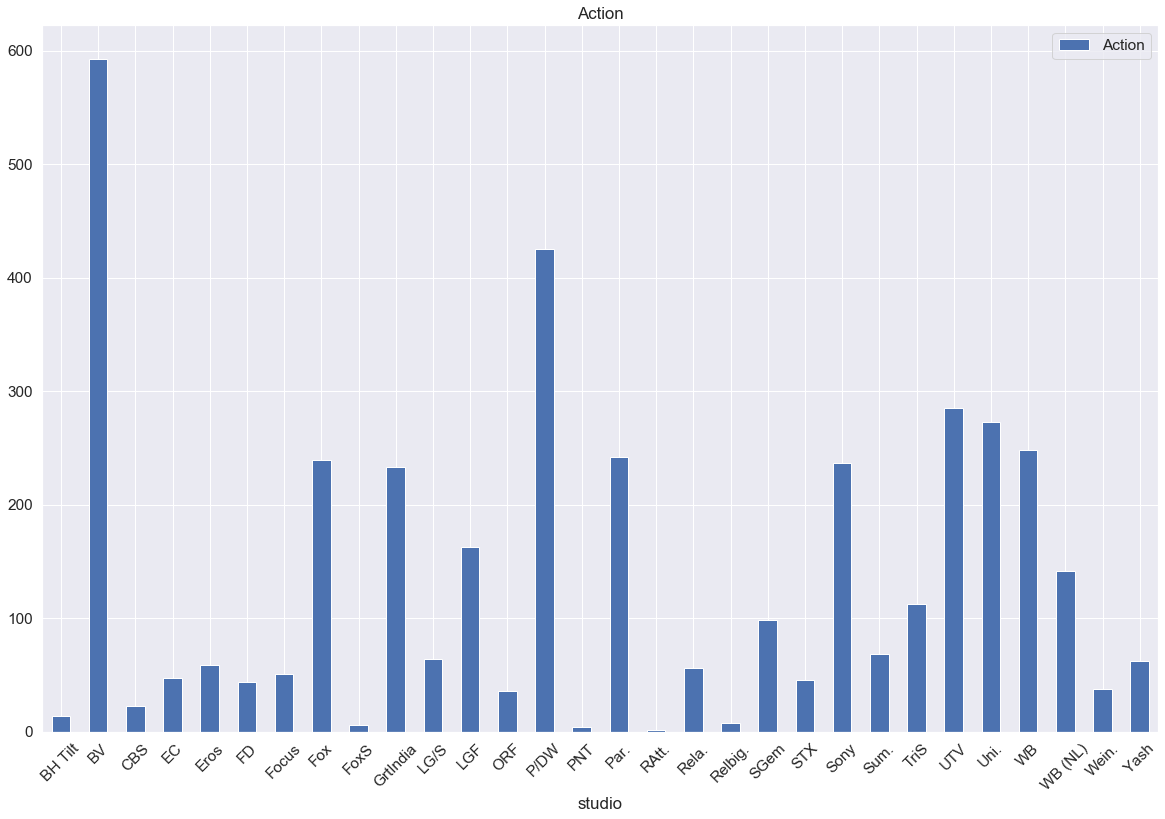

In [169]:
df_action = df_studio
df_action.drop(['Adventure', 'Animation', 'Fantasy', 'Sci-Fi'], inplace = True)
df = pd.pivot_table(data = df_action,
                    index ='studio',
                    values ='worldwide_profit',
                    columns ='genre')

df.plot.bar(rot = 45, subplots = True, figsize = (20,13))

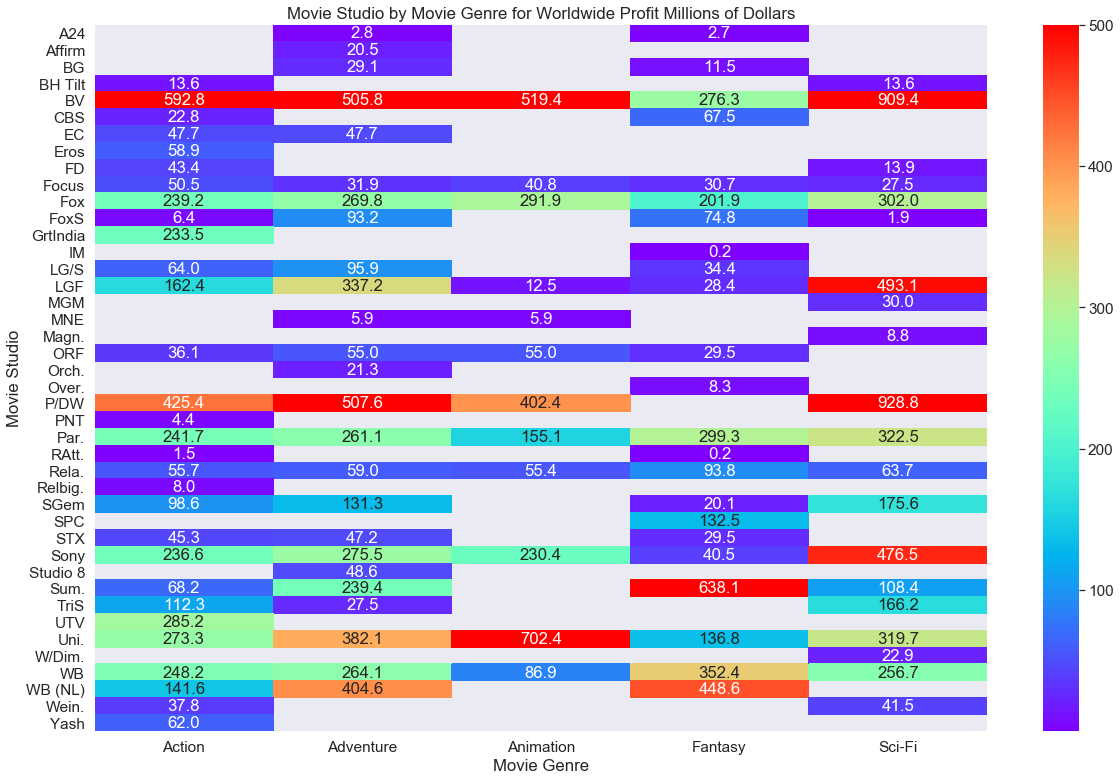

In [95]:
df = pd.pivot_table(data=df_studio,
                    index='studio',
                    values='worldwide_profit',
                    columns='genre')
plt.subplots(figsize=(20,13))
plt.title('Movie Studio by Movie Genre for Worldwide Profit Millions of Dollars')
res = sns.heatmap(df, cmap='rainbow', annot=True, fmt=".1f", vmax=500)
#res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
#res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
sns.set(font_scale=1.4)
bottom = 0
top = 0
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Movie Genre')
plt.ylabel('Movie Studio')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c4b0c250>,
      dtype=object)

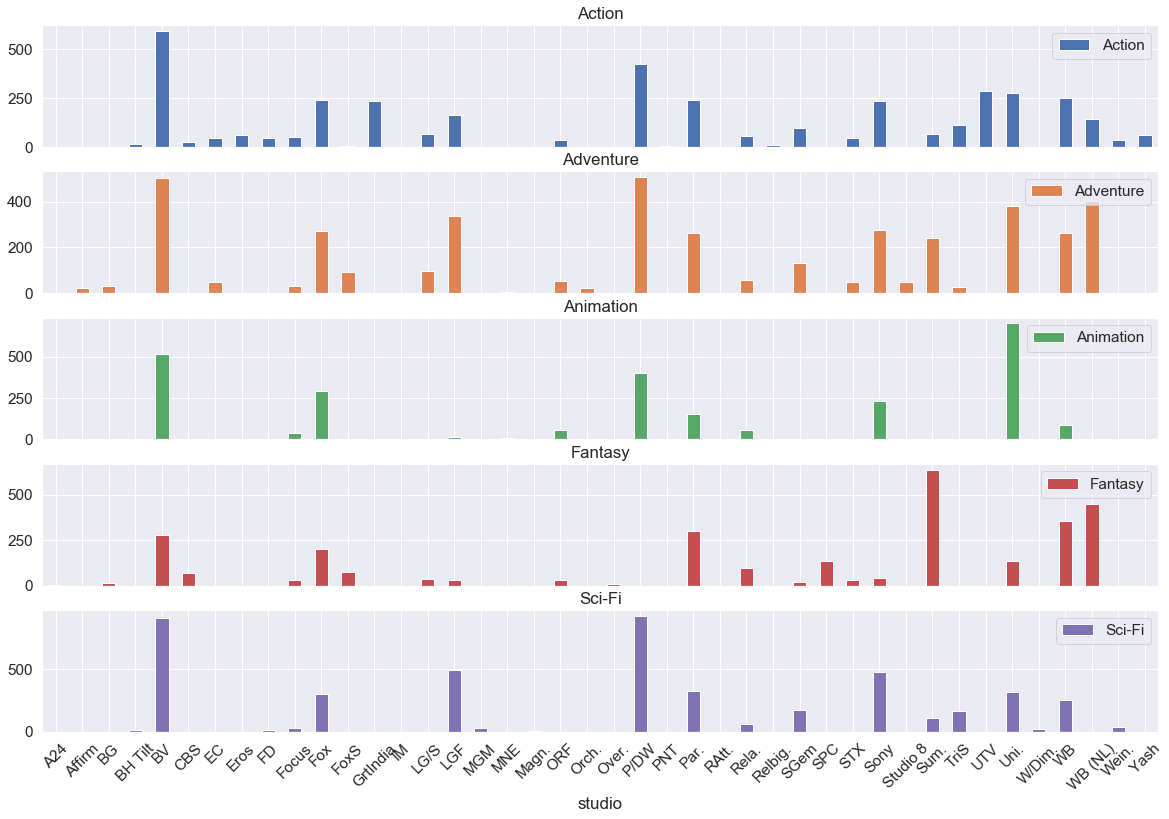

In [149]:
df = pd.pivot_table(data = df_studio,
                    index ='studio',
                    values ='worldwide_profit',
                    columns ='genre')

df.plot.bar(rot = 45, subplots = True, figsize = (20,13))